# DELAY ARRIVAL PREDICTION PROJECT

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("2008.csv")

In [4]:
plane = pd.read_csv("plane-data.csv")

In [5]:
plane.head(10)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,N056AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,N057AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,N058AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,N059AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,N060AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
va_inf = pd.read_csv("variable-descriptions.csv", sep =",")

In [7]:
va_inf.head(10)

,Variable descriptions,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Name,Description
2,1.0,Year,1987-2008
3,2.0,Month,12-Jan
4,3.0,DayofMonth,31-Jan
5,4.0,DayOfWeek,1 (Monday) - 7 (Sunday)
6,5.0,DepTime,"actual departure time (local, hhmm)"
7,6.0,CRSDepTime,"scheduled departure time (local, hhmm)"
8,7.0,ArrTime,"actual arrival time (local, hhmm)"
9,8.0,CRSArrTime,"scheduled arrival time (local, hhmm)"


In [8]:
carriers_data = pd.read_csv("carriers.csv", sep =",")

In [9]:
carriers_data.head(10)

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
5,09Q,"Swift Air, LLC"
6,0BQ,DCA
7,0CQ,ACM AIR CHARTER GmbH
8,0FQ,"Maine Aviation Aircraft Charter, LLC"
9,0GQ,"Inter Island Airways, d/b/a Inter Island Air"


# PREPROCESSING FEATURES

In [10]:
df.shape

(2389217, 29)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [12]:
df.columns = ['year', 'month', 'day', 'day_of_week', 'departure_time','scheduled_departure','arrival_time',
              'scheduled_arrival','airline', 'flight_number', 'tail_number', 'elapsed_time', 'scheduled_time', 
              'air_time', 'arrival_delay','departure_delay', 'origin_airport', 'destination_airport','distance',
              'taxi_in','taxi_out','cancelled','cancellation_reason','diverted', 'airline_delay','weather_delay',
              'air_system_delay', 'security_delay', 'late_aircraft_delay']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day                  int64  
 3   day_of_week          int64  
 4   departure_time       float64
 5   scheduled_departure  int64  
 6   arrival_time         float64
 7   scheduled_arrival    int64  
 8   airline              object 
 9   flight_number        int64  
 10  tail_number          object 
 11  elapsed_time         float64
 12  scheduled_time       float64
 13  air_time             float64
 14  arrival_delay        float64
 15  departure_delay      float64
 16  origin_airport       object 
 17  destination_airport  object 
 18  distance             int64  
 19  taxi_in              float64
 20  taxi_out             float64
 21  cancelled            int64  
 22  cancellation_reason  object 
 23  diverted             int64  
 24

In [14]:
df.head()

,year,month,day,day_of_week,departure_time,scheduled_departure,arrival_time,scheduled_arrival,airline,flight_number,...,taxi_in,taxi_out,cancelled,cancellation_reason,diverted,airline_delay,weather_delay,air_system_delay,security_delay,late_aircraft_delay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [15]:
df.tail()

,year,month,day,day_of_week,departure_time,scheduled_departure,arrival_time,scheduled_arrival,airline,flight_number,...,taxi_in,taxi_out,cancelled,cancellation_reason,diverted,airline_delay,weather_delay,air_system_delay,security_delay,late_aircraft_delay
2389212,2008,4,17,4,1025.0,1025,1234.0,1237,DL,1207,...,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389213,2008,4,17,4,1319.0,1320,1527.0,1524,DL,1208,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389214,2008,4,17,4,1335.0,1335,1556.0,1553,DL,1209,...,7.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389215,2008,4,17,4,1933.0,1935,2140.0,2141,DL,1210,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389216,2008,4,17,4,621.0,615,752.0,754,DL,1211,...,15.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [16]:
# Target feature
delay_type = lambda x:(0,1)[x > 10]
df['delay'] = df['arrival_delay'].apply(delay_type)

In [17]:
# Drop columns that we cannot collect the data at the time we make the prediction
# 'arrival_time','elapsed_time', 'air_time','cancellation_reason','air_system_delay', 'security_delay', 'airline_delay','late_aircraft_delay', 'weather_delay'
df = df.drop(columns = ['arrival_time','departure_time','elapsed_time', 'air_time','cancellation_reason',
       'air_system_delay', 'security_delay', 'airline_delay',
       'late_aircraft_delay', 'weather_delay', 'cancelled', 'diverted'])

In [18]:
df.shape

(2389217, 18)

In [19]:
df.head()

,year,month,day,day_of_week,scheduled_departure,scheduled_arrival,airline,flight_number,tail_number,scheduled_time,arrival_delay,departure_delay,origin_airport,destination_airport,distance,taxi_in,taxi_out,delay
0,2008,1,3,4,1325,1435,WN,588,N240WN,70.0,16.0,18.0,HOU,LIT,393,4.0,9.0,1
1,2008,1,3,4,1120,1245,WN,1343,N523SW,85.0,2.0,5.0,HOU,MAF,441,3.0,8.0,0
2,2008,1,3,4,2015,2140,WN,3841,N280WN,85.0,-4.0,-6.0,HOU,MAF,441,2.0,14.0,0
3,2008,1,3,4,855,1205,WN,3,N308SA,130.0,-2.0,8.0,HOU,MCO,848,5.0,7.0,0
4,2008,1,3,4,1400,1710,WN,25,N462WN,130.0,16.0,23.0,HOU,MCO,848,6.0,10.0,1


In [20]:
#check our target
df['delay'].value_counts()

0    1700099
1     689118
Name: delay, dtype: int64

In [21]:
df.describe(percentiles=[.01, .1, .25, .5, .75, .9, .99])

,year,month,day,day_of_week,scheduled_departure,scheduled_arrival,flight_number,scheduled_time,arrival_delay,departure_delay,distance,taxi_in,taxi_out,delay
count,2389217.0,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06,2.389217e+06,2.388810e+06,2.319121e+06,2.324775e+06,2.389217e+06,2.319121e+06,2.324775e+06,2.389217e+06
mean,2008.0,2.505009e+00,1.566386e+01,3.909625e+00,1.329992e+03,1.496744e+03,2.213888e+03,1.293776e+02,1.027357e+01,1.143636e+01,7.261589e+02,6.839862e+00,1.668584e+01,2.884284e-01
std,0.0,1.121493e+00,8.750405e+00,1.980431e+00,4.657833e+02,4.845238e+02,1.951392e+03,6.948246e+01,3.963429e+01,3.653229e+01,5.571763e+02,4.846435e+00,1.102905e+01,4.530315e-01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.500000e+01,-9.100000e+01,-9.200000e+01,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00
1%,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+02,4.430000e+02,2.100000e+01,4.000000e+01,-3.000000e+01,-1.200000e+01,8.600000e+01,2.000000e+00,5.000000e+00,0.000000e+00
10%,2008.0,1.000000e+00,4.000000e+00,1.000000e+00,7.060000e+02,8.480000e+02,2.350000e+02,6.200000e+01,-1.600000e+01,-7.000000e+00,2.000000e+02,3.000000e+00,8.000000e+00,0.000000e+00
25%,2008.0,1.000000e+00,8.000000e+00,2.000000e+00,9.270000e+02,1.115000e+03,6.050000e+02,8.000000e+01,-9.000000e+00,-4.000000e+00,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00
50%,2008.0,3.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.520000e+03,1.544000e+03,1.110000e+02,0.000000e+00,0.000000e+00,5.830000e+02,6.000000e+00,1.400000e+01,0.000000e+00
75%,2008.0,4.000000e+00,2.300000e+01,6.000000e+00,1.720000e+03,1.910000e+03,3.631000e+03,1.600000e+02,1.500000e+01,1.100000e+01,9.570000e+02,8.000000e+00,1.900000e+01,1.000000e+00
90%,2008.0,4.000000e+00,2.800000e+01,7.000000e+00,1.950000e+03,2.139000e+03,5.448000e+03,2.250000e+02,4.600000e+01,4.200000e+01,1.506000e+03,1.200000e+01,2.800000e+01,1.000000e+00


In [22]:
df.describe(include = 'O')

,airline,tail_number,origin_airport,destination_airport
count,2389217,2346765,2389217,2389217
unique,20,5031,291,293
top,WN,N693BR,ATL,ATL
freq,398966,1526,137014,136950


## Handle missing data

In [23]:
#Check null values
df.isnull().sum()

year                       0
month                      0
day                        0
day_of_week                0
scheduled_departure        0
scheduled_arrival          0
airline                    0
flight_number              0
tail_number            42452
scheduled_time           407
arrival_delay          70096
departure_delay        64442
origin_airport             0
destination_airport        0
distance                   0
taxi_in                70096
taxi_out               64442
delay                      0
dtype: int64

In [24]:
#Check percentage of null value in each column
df.isnull().sum()/len(df)*100

year                   0.000000
month                  0.000000
day                    0.000000
day_of_week            0.000000
scheduled_departure    0.000000
scheduled_arrival      0.000000
airline                0.000000
flight_number          0.000000
tail_number            1.776816
scheduled_time         0.017035
arrival_delay          2.933848
departure_delay        2.697202
origin_airport         0.000000
destination_airport    0.000000
distance               0.000000
taxi_in                2.933848
taxi_out               2.697202
delay                  0.000000
dtype: float64

In [25]:
df = df.dropna()

In [26]:
# Check if duplicated values
df.duplicated()
# Remove duplicated values:
df.drop_duplicates(inplace = True)

In [27]:
df.shape

(2319115, 18)

# EDA

In [28]:
df.describe(percentiles = [.01, 0.25, 0.5, 0.75, 0.99])

,year,month,day,day_of_week,scheduled_departure,scheduled_arrival,flight_number,scheduled_time,arrival_delay,departure_delay,distance,taxi_in,taxi_out,delay
count,2319115.0,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06
mean,2008.0,2.510823e+00,1.569612e+01,3.915920e+00,1.329276e+03,1.495850e+03,2.193090e+03,1.297344e+02,1.027354e+01,1.138915e+01,7.298120e+02,6.839860e+00,1.667740e+01,2.971457e-01
std,0.0,1.123482e+00,8.744863e+00,1.982642e+00,4.660631e+02,4.848134e+02,1.942081e+03,6.971685e+01,3.963432e+01,3.642261e+01,5.591560e+02,4.846439e+00,1.101204e+01,4.570013e-01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.100000e+01,-9.100000e+01,-9.200000e+01,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00
1%,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+02,4.201400e+02,2.000000e+01,3.900000e+01,-3.000000e+01,-1.200000e+01,8.900000e+01,2.000000e+00,5.000000e+00,0.000000e+00
25%,2008.0,1.000000e+00,8.000000e+00,2.000000e+00,9.250000e+02,1.115000e+03,5.960000e+02,8.000000e+01,-9.000000e+00,-4.000000e+00,3.280000e+02,4.000000e+00,1.000000e+01,0.000000e+00
50%,2008.0,3.000000e+00,1.600000e+01,4.000000e+00,1.322000e+03,1.519000e+03,1.529000e+03,1.120000e+02,0.000000e+00,0.000000e+00,5.850000e+02,6.000000e+00,1.400000e+01,0.000000e+00
75%,2008.0,4.000000e+00,2.300000e+01,6.000000e+00,1.720000e+03,1.910000e+03,3.574000e+03,1.600000e+02,1.500000e+01,1.100000e+01,9.640000e+02,8.000000e+00,1.900000e+01,1.000000e+00
99%,2008.0,4.000000e+00,3.100000e+01,7.000000e+00,2.231000e+03,2.340000e+03,7.259000e+03,3.648600e+02,1.740000e+02,1.670000e+02,2.556000e+03,2.600000e+01,5.900000e+01,1.000000e+00
max,2008.0,4.000000e+00,3.100000e+01,7.000000e+00,2.359000e+03,2.359000e+03,9.740000e+03,6.600000e+02,2.461000e+03,2.467000e+03,4.962000e+03,2.130000e+02,3.830000e+02,1.000000e+00


In [29]:
df.describe().columns

Index(['year', 'month', 'day', 'day_of_week', 'scheduled_departure',
       'scheduled_arrival', 'flight_number', 'scheduled_time', 'arrival_delay',
       'departure_delay', 'distance', 'taxi_in', 'taxi_out', 'delay'],
      dtype='object')

In [30]:
df.describe(include = "O")

,airline,tail_number,origin_airport,destination_airport
count,2319115,2319115,2319115,2319115
unique,20,5025,291,291
top,WN,N693BR,ATL,ATL
freq,393732,1522,133852,133521


In [31]:
df = df.drop(['year'],axis=1)

## Univariate Anaysis

<AxesSubplot:xlabel='delay', ylabel='count'>

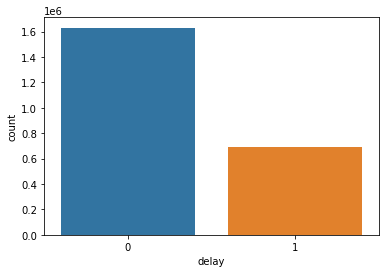

In [32]:
# Delay airline
sns.countplot(x='delay', data=df)

In [33]:
df.describe().columns

Index(['month', 'day', 'day_of_week', 'scheduled_departure',
       'scheduled_arrival', 'flight_number', 'scheduled_time', 'arrival_delay',
       'departure_delay', 'distance', 'taxi_in', 'taxi_out', 'delay'],
      dtype='object')

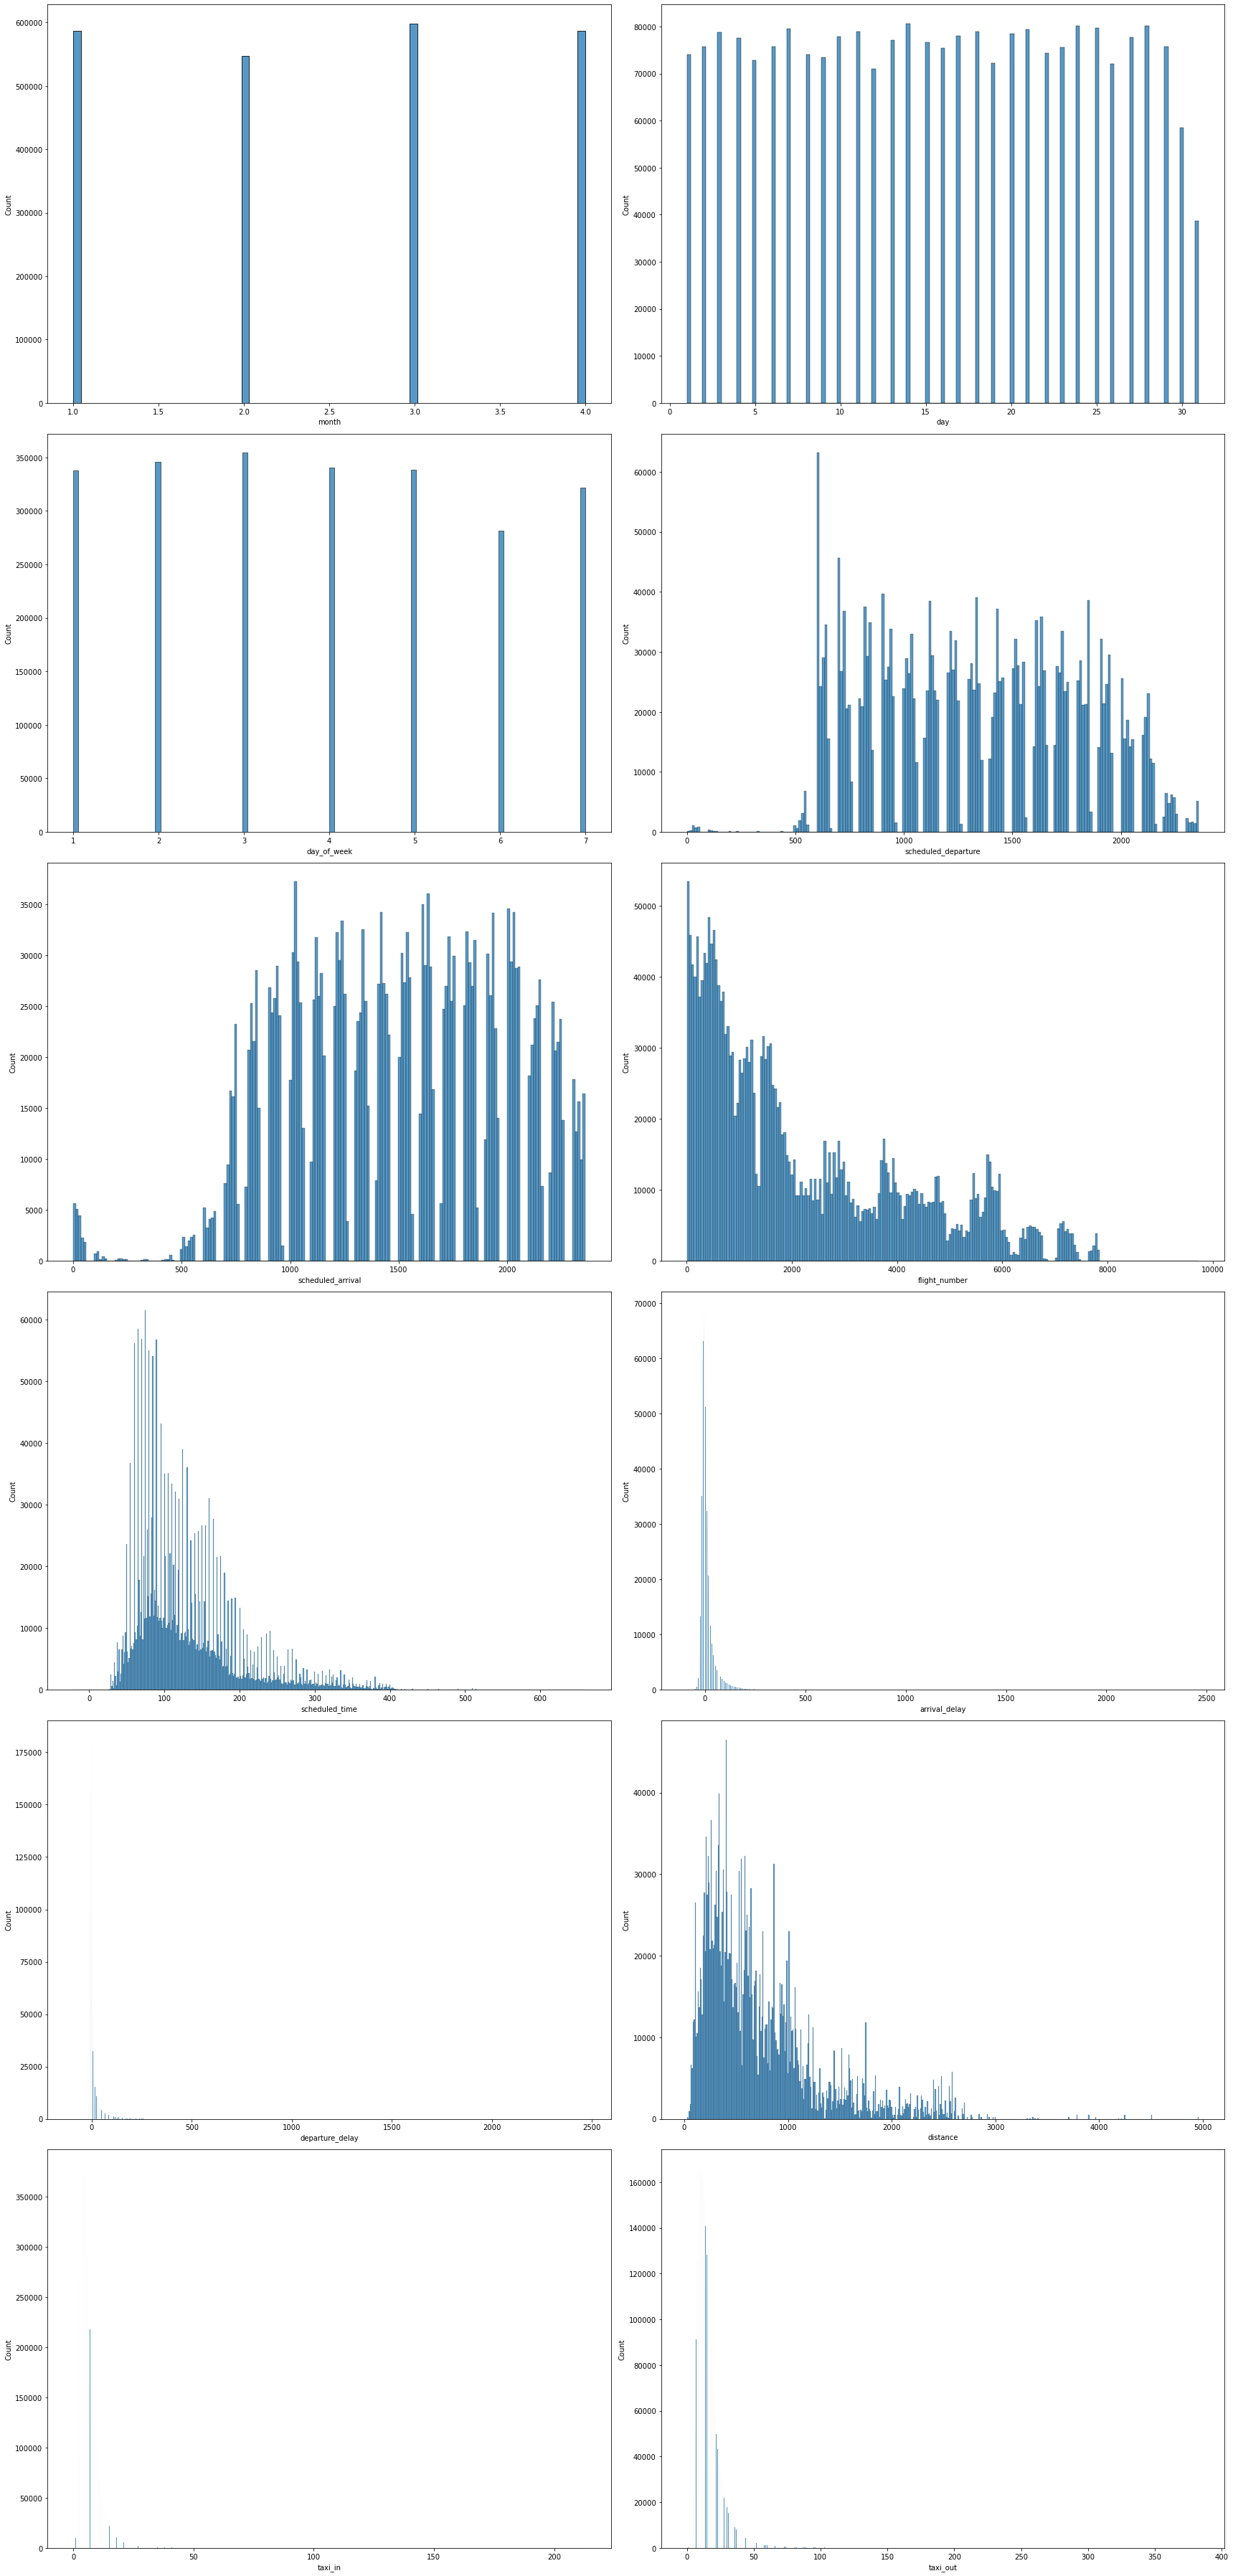

In [34]:
# Vislualize distribution of numeric data
list_feature_number = ['month', 'day', 'day_of_week', 'scheduled_departure',
       'scheduled_arrival', 'flight_number', 'scheduled_time', 'arrival_delay',
       'departure_delay', 'distance', 'taxi_in', 'taxi_out']

fig,ax = plt.subplots(6,2, figsize=(24,50)) 
i=0 
for x in range(6):
    for y in range(2):
        sns.histplot(df[list_feature_number[i]], ax = ax[x,y])
        i+=1
plt.tight_layout()
plt.show()

In [35]:
# Vislualize distribution of categorical data
df.describe(include = "O").columns

Index(['airline', 'tail_number', 'origin_airport', 'destination_airport'], dtype='object')

<AxesSubplot:xlabel='airline', ylabel='count'>

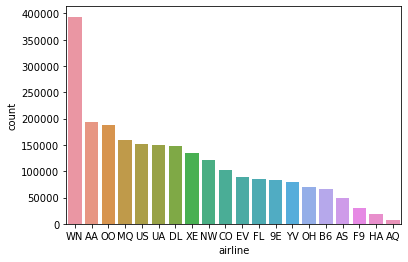

In [36]:
# airline
sns.countplot(x='airline', data=df, order=df['airline'].value_counts().index)

In [37]:
# origin_airport
ori = df['origin_airport'].value_counts().to_frame()
ori

,origin_airport
ATL,133852
ORD,109196
DFW,88575
DEN,77023
LAX,72096
...,...
RHI,27
PLN,26
TUP,10
DLG,2


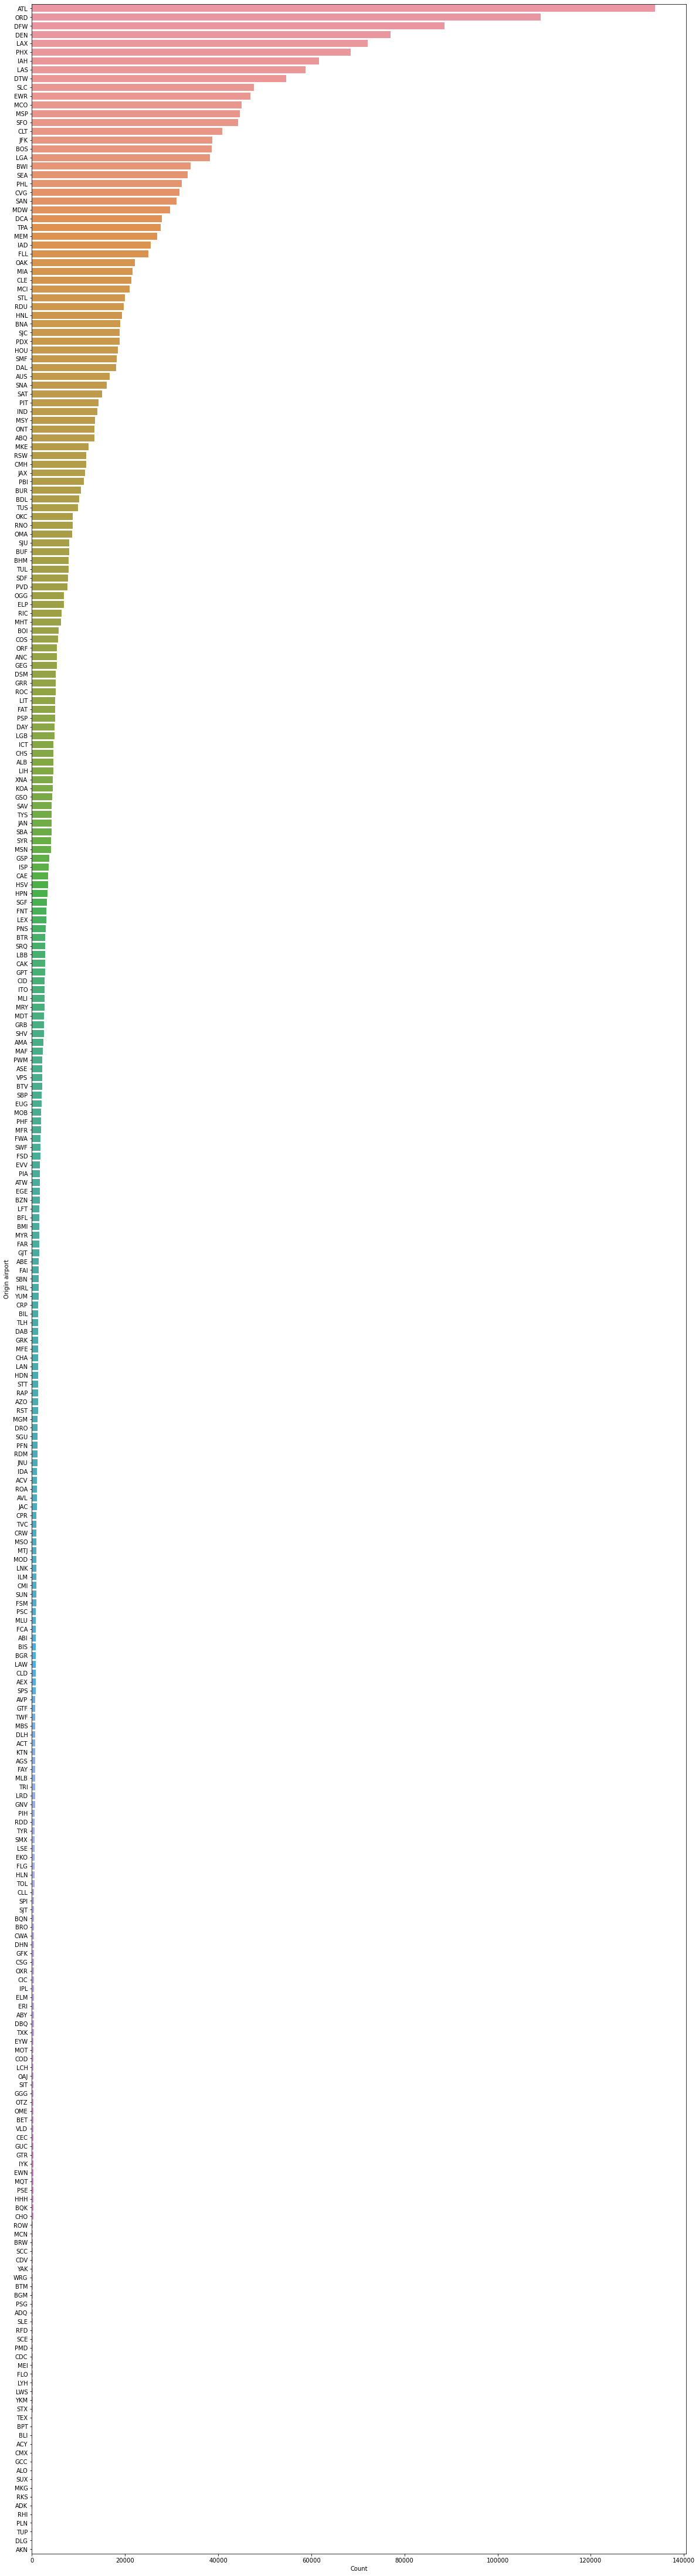

In [38]:
f, ax = plt.subplots(figsize=(20, 80))
ax = sns.barplot(x=ori.origin_airport, y=ori.index, data=ori)
ax.set_yticklabels(ori.index)
ax.set_xlabel("Count")
ax.set_ylabel("Origin airport")
plt.show()

In [39]:
des = df['destination_airport'].value_counts().to_frame()
des

,destination_airport
ATL,133521
ORD,108746
DFW,88146
DEN,77010
LAX,72079
...,...
RHI,27
PLN,26
TUP,9
DLG,2


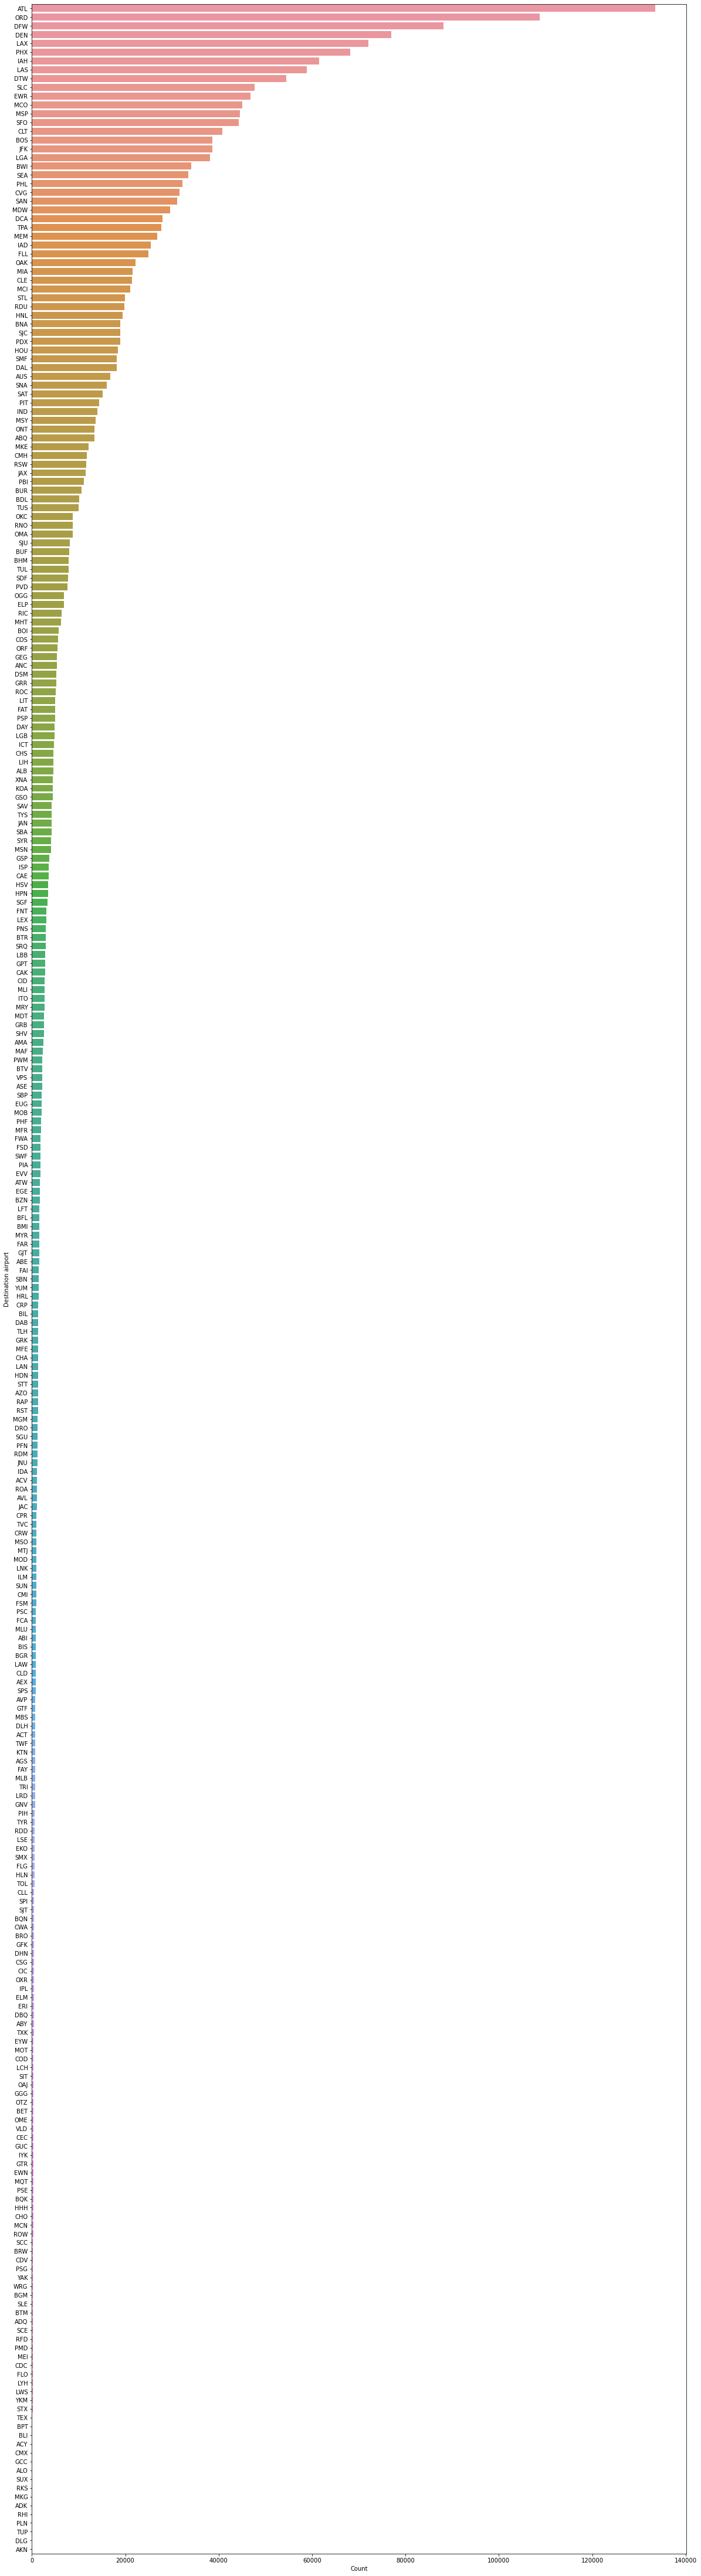

In [40]:
f, ax = plt.subplots(figsize=(20, 80))
ax = sns.barplot(x=des.destination_airport, y=des.index, data=des)
ax.set_yticklabels(des.index)
ax.set_xlabel("Count")
ax.set_ylabel("Destination airport")
plt.show()

## Bivariate analysis

<AxesSubplot:xlabel='airline', ylabel='count'>

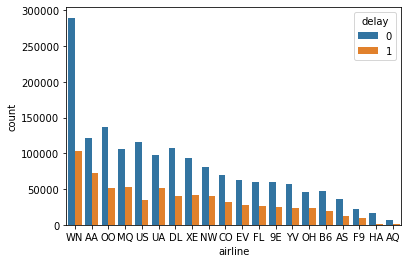

In [41]:
sns.countplot(x='airline', data=df,hue='delay',order=df['airline'].value_counts().index)

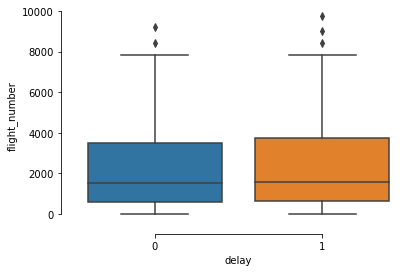

In [42]:
sns.boxplot(y='flight_number', x="delay",data=df)
sns.despine(offset=10, trim=True)

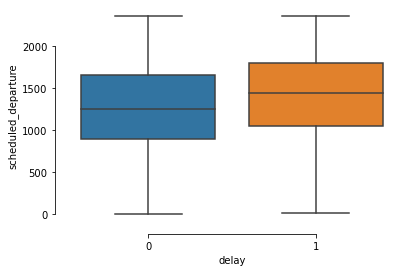

In [43]:
sns.boxplot(y='scheduled_departure', x="delay",data=df)
sns.despine(offset=10, trim=True)

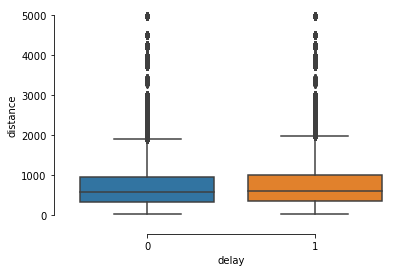

In [44]:
sns.boxplot(y='distance', x="delay",data=df)
sns.despine(offset=10, trim=True)

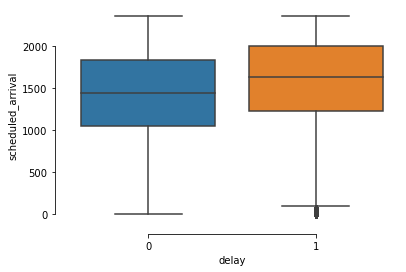

In [45]:
sns.boxplot(y='scheduled_arrival', x="delay",data=df)
sns.despine(offset=10, trim=True)

### Correlation matrix

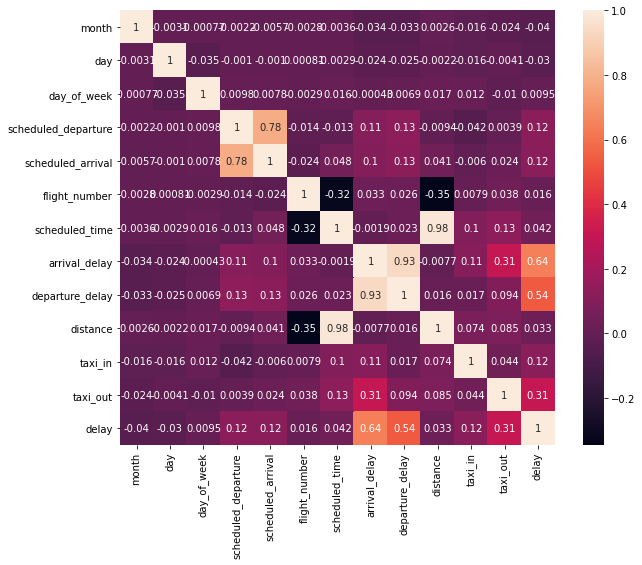

In [46]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.corr(), square=True, annot=True)

#### Insights:
- "arrival_delay" is high correlation with "departure_delay" => we will drop "arrival_delay" and "departure_delay
- "schedule time" and distance is high correled => drop "schedule_time"

In [47]:
df = df.drop(columns = ['departure_delay','arrival_delay','scheduled_time'])

# MODEL BUILDING

## Feature selection

In [48]:
# Numeric features
df.describe()

,month,day,day_of_week,scheduled_departure,scheduled_arrival,flight_number,distance,taxi_in,taxi_out,delay
count,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06,2.319115e+06
mean,2.510823e+00,1.569612e+01,3.915920e+00,1.329276e+03,1.495850e+03,2.193090e+03,7.298120e+02,6.839860e+00,1.667740e+01,2.971457e-01
std,1.123482e+00,8.744863e+00,1.982642e+00,4.660631e+02,4.848134e+02,1.942081e+03,5.591560e+02,4.846439e+00,1.101204e+01,4.570013e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,8.000000e+00,2.000000e+00,9.250000e+02,1.115000e+03,5.960000e+02,3.280000e+02,4.000000e+00,1.000000e+01,0.000000e+00
50%,3.000000e+00,1.600000e+01,4.000000e+00,1.322000e+03,1.519000e+03,1.529000e+03,5.850000e+02,6.000000e+00,1.400000e+01,0.000000e+00
75%,4.000000e+00,2.300000e+01,6.000000e+00,1.720000e+03,1.910000e+03,3.574000e+03,9.640000e+02,8.000000e+00,1.900000e+01,1.000000e+00
max,4.000000e+00,3.100000e+01,7.000000e+00,2.359000e+03,2.359000e+03,9.740000e+03,4.962000e+03,2.130000e+02,3.830000e+02,1.000000e+00


In [49]:
# Transform categorical data
df.describe(include = "O")

,airline,tail_number,origin_airport,destination_airport
count,2319115,2319115,2319115,2319115
unique,20,5025,291,291
top,WN,N693BR,ATL,ATL
freq,393732,1522,133852,133521


- "tail_number" has too many unique values => remove

In [50]:
# remove "year" and "tail_number"
df = df.drop(columns = ['tail_number'])

In [51]:
df.shape

(2319115, 13)

In [52]:
# airline
df['airline'].value_counts().to_frame()

,airline
WN,393732
AA,193114
OO,187917
MQ,158426
US,150891
UA,149156
DL,147987
XE,134444
NW,121162
CO,101394


In [53]:
# original_airport
ori

,origin_airport
ATL,133852
ORD,109196
DFW,88575
DEN,77023
LAX,72096
...,...
RHI,27
PLN,26
TUP,10
DLG,2


In [54]:
ori.loc[ori['origin_airport']<10000].count()

origin_airport    234
dtype: int64

In [55]:
# grouping
for i in ori.loc[ori['origin_airport']<10000].index:
    df.loc[df['origin_airport'] == i, 'origin_airport'] = 'Other'

In [56]:
df['origin_airport'].value_counts().to_frame()

,origin_airport
Other,433340
ATL,133852
ORD,109196
DFW,88575
DEN,77023
LAX,72096
PHX,68434
IAH,61601
LAS,58802
DTW,54615


#### + "Destination_airport"

In [57]:
des

,destination_airport
ATL,133521
ORD,108746
DFW,88146
DEN,77010
LAX,72079
...,...
RHI,27
PLN,26
TUP,9
DLG,2


In [58]:
des.loc[des['destination_airport']<10000].count()

destination_airport    234
dtype: int64

In [59]:
# grouping
for i in des.loc[des['destination_airport']<10000].index:
    df.loc[df['destination_airport'] == i, 'destination_airport'] = 'Other'

In [60]:
df['destination_airport'].value_counts().to_frame()

,destination_airport
Other,434862
ATL,133521
ORD,108746
DFW,88146
DEN,77010
LAX,72079
PHX,68217
IAH,61504
LAS,58853
DTW,54473


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319115 entries, 0 to 2389216
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   month                int64  
 1   day                  int64  
 2   day_of_week          int64  
 3   scheduled_departure  int64  
 4   scheduled_arrival    int64  
 5   airline              object 
 6   flight_number        int64  
 7   origin_airport       object 
 8   destination_airport  object 
 9   distance             int64  
 10  taxi_in              float64
 11  taxi_out             float64
 12  delay                int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 247.7+ MB


In [62]:
df.shape

(2319115, 13)

In [63]:
one_hot_encoded_data = pd.get_dummies(df)
final_df = one_hot_encoded_data

In [64]:
final_df.shape

(2319115, 146)

In [65]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319115 entries, 0 to 2389216
Columns: 146 entries, month to destination_airport_TPA
dtypes: float64(2), int64(8), uint8(136)
memory usage: 495.4 MB


## Model selection

In [66]:
# Choose 100.000 data points to train models  
data = final_df.sample(n = 100000,random_state = 111 )

### Holdout

In [67]:
# Split train test data
y = data.delay
X = data.drop(columns=['delay'],axis=1)
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature important in random forrest

In [68]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [69]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

taxi_out                   0.157959
scheduled_arrival          0.086408
scheduled_departure        0.085593
flight_number              0.079086
day                        0.077827
                             ...   
destination_airport_HNL    0.000809
destination_airport_BUR    0.000792
airline_HA                 0.000785
origin_airport_HNL         0.000757
airline_AQ                 0.000347
Length: 145, dtype: float64

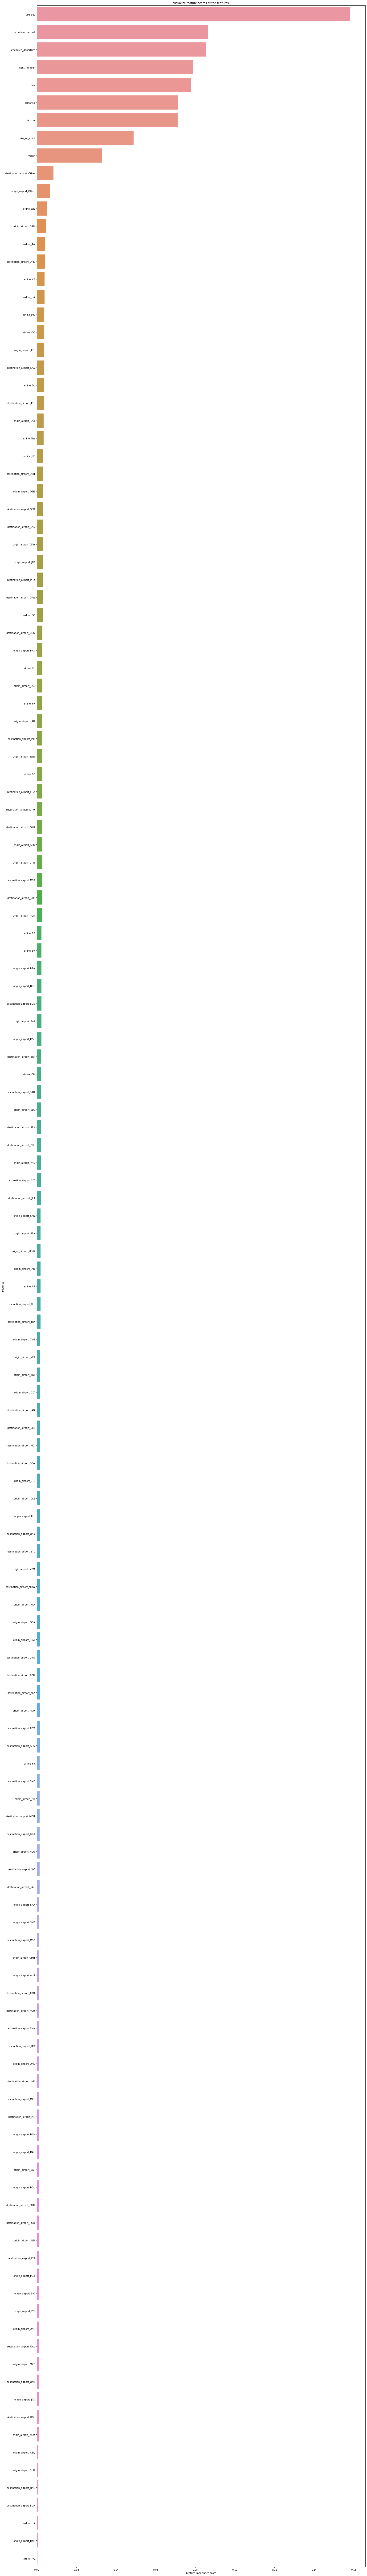

In [70]:
# Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(25, 200))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## Basic models

### Logistic Regression

In [71]:
lr = LogisticRegression()

# fit the model with the training data
model = lr.fit(X_train,y_train)

# predict the target on the train dataset
y_train_pred = model.predict(X_train)

# predict the target on the test dataset
y_test_pred = model.predict(X_test)


# Accuracy Score on test dataset
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83     14135
           1       0.62      0.23      0.33      5865

    accuracy                           0.73     20000
   macro avg       0.68      0.58      0.58     20000
weighted avg       0.71      0.73      0.69     20000

              precision    recall  f1-score   support

           0       0.75      0.94      0.83     56399
           1       0.62      0.23      0.34     23601

    accuracy                           0.73     80000
   macro avg       0.68      0.59      0.58     80000
weighted avg       0.71      0.73      0.69     80000



In [72]:
result = pd.DataFrame(model.predict_proba(X_test))
result.head()

,0,1
0,0.084826,0.915174
1,0.719695,0.280305
2,0.391692,0.608308
3,0.781573,0.218427
4,0.691243,0.308757


In [73]:
fpr, tpr, threshold = roc_curve(y_test,result[1])
lr_auc = auc(fpr, tpr)
lr_auc

0.6355169114292185

In [74]:
lr_gini = 2*lr_auc-1
lr_gini

0.271033822858437

### Decision Tree Classification

In [75]:
dt = DecisionTreeClassifier()

# fit the model with the training data
model_dt = dt.fit(X_train,y_train)

# predict the target on the train dataset
y_train_pred = model_dt.predict(X_train)

# predict the target on the test dataset
y_test_pred = model_dt.predict(X_test)


# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76     14135
           1       0.43      0.44      0.44      5865

    accuracy                           0.67     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.67      0.67      0.67     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56399
           1       1.00      1.00      1.00     23601

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [76]:
result_2 = pd.DataFrame(model_dt.predict_proba(X_test))
result_2.head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


In [77]:
fpr, tpr, threshold = roc_curve(y_test,result_2[1])
dt_auc = auc(fpr, tpr)
dt_auc

0.6016743911695498

In [78]:
dt_gini = 2*dt_auc-1
dt_gini

0.2033487823390996

### Naive Bayes

In [79]:
nb = GaussianNB()

# fit the model with the training data
model_nb = nb.fit(X_train,y_train)

# predict the target on the train dataset
y_train_pred = model_nb.predict(X_train)

# predict the target on the test dataset
y_test_pred = model_nb.predict(X_test)

# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.52      0.63     14135
           1       0.36      0.65      0.46      5865

    accuracy                           0.56     20000
   macro avg       0.57      0.58      0.54     20000
weighted avg       0.66      0.56      0.58     20000

              precision    recall  f1-score   support

           0       0.79      0.52      0.63     56399
           1       0.37      0.66      0.47     23601

    accuracy                           0.57     80000
   macro avg       0.58      0.59      0.55     80000
weighted avg       0.66      0.57      0.58     80000



In [80]:
result_3 = pd.DataFrame(model_nb.predict_proba(X_test))
result_3.head()

,0,1
0,4.479295e-14,1.000000
1,1.961837e-01,0.803816
2,2.711020e-11,1.000000
3,4.397966e-04,0.999560
4,9.537745e-05,0.999905


In [81]:
fpr, tpr, threshold = roc_curve(y_test,result_3[1])
nb_auc = auc(fpr, tpr)
nb_auc

0.63321864941975

In [82]:
nb_gini = 2*nb_auc-1
nb_gini

0.26643729883950007

### SVM

In [83]:
svm = SVC()

# fit the model with the training data
model_svm = svm.fit(X_train,y_train)

# predict the target on the train dataset
y_train_pred = model_svm.predict(X_train)

# predict the target on the test dataset
y_test_pred = model_svm.predict(X_test)


# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83     14135
           1       1.00      0.00      0.00      5865

    accuracy                           0.71     20000
   macro avg       0.85      0.50      0.41     20000
weighted avg       0.79      0.71      0.59     20000

              precision    recall  f1-score   support

           0       0.70      1.00      0.83     56399
           1       0.00      0.00      0.00     23601

    accuracy                           0.70     80000
   macro avg       0.35      0.50      0.41     80000
weighted avg       0.50      0.70      0.58     80000



In [84]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[14135     0]
 [ 5864     1]]


<AxesSubplot:>

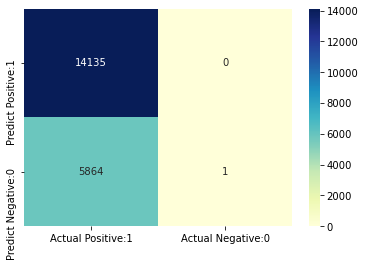

In [85]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
svm_auc = auc(fpr, tpr)
svm_auc

0.5000852514919011

In [87]:
svm_gini = 2*svm_auc-1
svm_gini

0.00017050298380216766

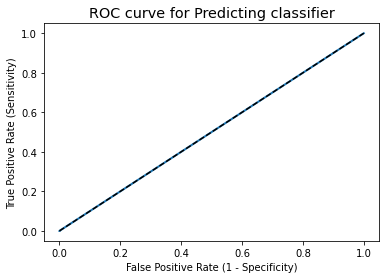

In [88]:
# plot ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## Ensemble models

### Random forrest

In [89]:
rf = RandomForestClassifier()

# fit the model with the training data
model_rf = rf.fit(X_train,y_train)

# predict the target on the train dataset
y_train_pred = model_rf.predict(X_train)

# predict the target on the test dataset
y_test_pred = model_rf.predict(X_test)

# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
# Accuracy Score on train dataset
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     14135
           1       0.72      0.30      0.43      5865

    accuracy                           0.76     20000
   macro avg       0.74      0.63      0.64     20000
weighted avg       0.75      0.76      0.73     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56399
           1       1.00      1.00      1.00     23601

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [90]:
result_5 = pd.DataFrame(model_rf.predict_proba(X_test))
result_5.head()

,0,1
0,0.15,0.85
1,0.85,0.15
2,0.42,0.58
3,0.58,0.42
4,0.70,0.30


In [91]:
fpr, tpr, threshold = roc_curve(y_test,result_5[1])
rf_auc = auc(fpr, tpr)
rf_auc

0.7529282816924004

In [92]:
rf_gini = 2*rf_auc-1
rf_gini

0.5058565633848009

### Gradient Boosting

In [93]:
gb = GradientBoostingClassifier(n_estimators=100,max_depth=5)

# fit the model with the training data
model_gb = gb.fit(X_train,y_train)

# predict the target on the train dataset
y_train_pred = model_gb.predict(X_train)

# predict the target on the test dataset
y_test_pred = model_gb.predict(X_test)


# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
# Accuracy Score on train dataset
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85     14135
           1       0.74      0.30      0.42      5865

    accuracy                           0.76     20000
   macro avg       0.75      0.63      0.64     20000
weighted avg       0.76      0.76      0.73     20000

              precision    recall  f1-score   support

           0       0.77      0.96      0.86     56399
           1       0.77      0.32      0.45     23601

    accuracy                           0.77     80000
   macro avg       0.77      0.64      0.65     80000
weighted avg       0.77      0.77      0.73     80000



In [94]:
result_6 = pd.DataFrame(model_gb.predict_proba(X_test))
result_6.head()

,0,1
0,0.021313,0.978687
1,0.781417,0.218583
2,0.170348,0.829652
3,0.664174,0.335826
4,0.684964,0.315036


In [95]:
fpr, tpr, threshold = roc_curve(y_test,result_6[1])
gb_auc = auc(fpr, tpr)
gb_auc

0.7538921633463217

In [96]:
gb_gini = 2*gb_auc-1
gb_gini

0.5077843266926434

### LightGBM

In [97]:
lgb = LGBMClassifier()

# fit the model with the training data
model_lgb = lgb.fit(X_train,y_train)

# predict the target on the train dataset
y_train_pred = model_lgb.predict(X_train)

# predict the target on the test dataset
y_test_pred = model_lgb.predict(X_test)


# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
# Accuracy Score on train dataset
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     14135
           1       0.74      0.32      0.44      5865

    accuracy                           0.77     20000
   macro avg       0.76      0.64      0.65     20000
weighted avg       0.76      0.77      0.73     20000

              precision    recall  f1-score   support

           0       0.77      0.96      0.86     56399
           1       0.77      0.33      0.47     23601

    accuracy                           0.77     80000
   macro avg       0.77      0.65      0.66     80000
weighted avg       0.77      0.77      0.74     80000



In [98]:
result_7 = pd.DataFrame(model_lgb.predict_proba(X_test))
result_7.head()

,0,1
0,0.009141,0.990859
1,0.812573,0.187427
2,0.172994,0.827006
3,0.695655,0.304345
4,0.644992,0.355008


In [99]:
fpr, tpr, threshold = roc_curve(y_test,result_7[1])
lgb_auc = auc(fpr, tpr)
lgb_auc

0.7620748771663814

In [100]:
lgb_gini = 2*lgb_auc-1
lgb_gini

0.5241497543327629

### XGBoost

In [101]:
xgb = XGBClassifier()

# fit the model with the training data
model_xgb = nb.fit(X_train,y_train)

# predict the target on the train dataset
y_train_pred = model_xgb.predict(X_train)

# predict the target on the test dataset
y_test_pred = model_xgb.predict(X_test)

# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
# Accuracy Score on train dataset
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.52      0.63     14135
           1       0.36      0.65      0.46      5865

    accuracy                           0.56     20000
   macro avg       0.57      0.58      0.54     20000
weighted avg       0.66      0.56      0.58     20000

              precision    recall  f1-score   support

           0       0.79      0.52      0.63     56399
           1       0.37      0.66      0.47     23601

    accuracy                           0.57     80000
   macro avg       0.58      0.59      0.55     80000
weighted avg       0.66      0.57      0.58     80000



In [102]:
result_8 = pd.DataFrame(model_xgb.predict_proba(X_test))
result_8.head()

,0,1
0,4.479295e-14,1.000000
1,1.961837e-01,0.803816
2,2.711020e-11,1.000000
3,4.397966e-04,0.999560
4,9.537745e-05,0.999905


In [103]:
fpr, tpr, threshold = roc_curve(y_test,result_8[1])
xgb_auc = auc(fpr, tpr)
xgb_auc

0.63321864941975

In [104]:
xgb_gini = 2*xgb_auc-1
xgb_gini

0.26643729883950007

## Feature selection

### PCA

In [105]:
#Scale data
scale = StandardScaler()
normal_X = scale.fit_transform(X)

# Split train test of normal X
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(normal_X, y, test_size = 0.2, random_state=123)



Text(0, 0.5, 'cucumlative explain variance')

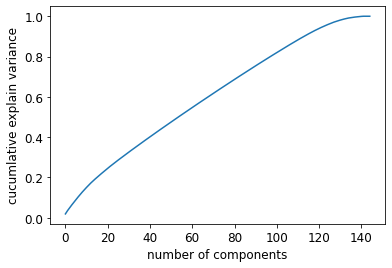

In [106]:
# Use PCA to reduce the demensions
pca = PCA()
pca.fit(X_train_pca)
# Plot to check the best number of component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cucumlative explain variance')

In [107]:
pca.n_components

In [108]:
# Apply PCA in train test dataset
X_train_PCA = pca.fit_transform(X_train_pca)
X_test_PCA = pca.fit_transform(X_test_pca)

### Logistic Regression

In [109]:
lr = LogisticRegression()

# fit the model with the training data
model_pca = lr.fit(X_train_pca,y_train_pca)

# predict the target on the train dataset
y_train_pred_pca = model_pca.predict(X_train_pca)

# predict the target on the test dataset
y_test_pred_pca = model_pca.predict(X_test_pca)


# Accuracy Score on dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.52      0.63     14135
           1       0.36      0.65      0.46      5865

    accuracy                           0.56     20000
   macro avg       0.57      0.58      0.54     20000
weighted avg       0.66      0.56      0.58     20000

              precision    recall  f1-score   support

           0       0.79      0.52      0.63     56399
           1       0.37      0.66      0.47     23601

    accuracy                           0.57     80000
   macro avg       0.58      0.59      0.55     80000
weighted avg       0.66      0.57      0.58     80000



In [110]:
result_9 = pd.DataFrame(model_pca.predict_proba(X_test))
result_9.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [111]:
fpr, tpr, threshold = roc_curve(y_test,result_9[1])
pca_lr_auc = auc(fpr, tpr)
pca_lr_auc

0.5

In [112]:
pca_lr_gini = 2*pca_lr_auc-1
pca_lr_gini

0.0

In [113]:
pca_lr_gini = 2*pca_lr_auc-1
pca_lr_gini

0.0

### Decision Tree Classification

In [114]:
dt = DecisionTreeClassifier()

# fit the model with the training data
model_dt_pca = dt.fit(X_train_pca,y_train_pca)

# predict the target on the train dataset
y_train_pred_pca = model_dt_pca.predict(X_train_pca)

# predict the target on the test dataset
y_test_pred_pca = model_dt.predict(X_test_pca)

# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.52      0.63     14135
           1       0.36      0.65      0.46      5865

    accuracy                           0.56     20000
   macro avg       0.57      0.58      0.54     20000
weighted avg       0.66      0.56      0.58     20000

              precision    recall  f1-score   support

           0       0.79      0.52      0.63     56399
           1       0.37      0.66      0.47     23601

    accuracy                           0.57     80000
   macro avg       0.58      0.59      0.55     80000
weighted avg       0.66      0.57      0.58     80000



In [115]:
result_10 = pd.DataFrame(model_dt_pca.predict_proba(X_test_pca))
result_10.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [116]:
fpr, tpr, threshold = roc_curve(y_test,result_10[1])
pca_dt_auc = auc(fpr, tpr)
pca_dt_auc

0.509056259651859

In [117]:
pca_dt_gini = 2*pca_dt_auc-1
pca_dt_gini

0.018112519303717933

### Naive Bayes

In [118]:
# Data for training in Naive Bayes doesn't need to be scaled
X_train_PCA_nb = pca.fit_transform(X_train)
X_test_PCA_nb = pca.fit_transform(X_test)

In [119]:
nb_pca = GaussianNB()

#Train model
pca_model = nb_pca.fit(X_train_PCA_nb, y_train)

y_test_pred_PCA = pca_model.predict(X_test_PCA_nb)
y_train_pred_PCA = pca_model.predict(X_train_PCA_nb)

# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred_PCA))
print(classification_report(y_train, y_train_pred_PCA))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73     14135
           1       0.41      0.51      0.45      5865

    accuracy                           0.64     20000
   macro avg       0.59      0.60      0.59     20000
weighted avg       0.67      0.64      0.65     20000

              precision    recall  f1-score   support

           0       0.78      0.67      0.72     56399
           1       0.41      0.55      0.47     23601

    accuracy                           0.63     80000
   macro avg       0.60      0.61      0.60     80000
weighted avg       0.67      0.63      0.65     80000



In [120]:
result_11 = pd.DataFrame(nb_pca.predict_proba(X_test))
result_11.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [121]:
fpr, tpr, threshold = roc_curve(y_test,result_11[1])
pca_nb_auc = auc(fpr, tpr)
pca_nb_auc

0.5

In [122]:
pca_nb_gini = 2*pca_nb_auc-1
pca_nb_gini

0.0

### SVM

In [123]:
svm = SVC()

# fit the model with the training data
model_svm_pca = svm.fit(X_train_pca,y_train_pca)

# predict the target on the train dataset
y_train_pred = model_svm_pca.predict(X_train_pca)

# predict the target on the test dataset
y_test_pred = model_svm_pca.predict(X_test_pca)


# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80     14135
           1       0.29      0.08      0.12      5865

    accuracy                           0.67     20000
   macro avg       0.50      0.50      0.46     20000
weighted avg       0.59      0.67      0.60     20000

              precision    recall  f1-score   support

           0       0.70      0.92      0.80     56399
           1       0.28      0.08      0.12     23601

    accuracy                           0.67     80000
   macro avg       0.49      0.50      0.46     80000
weighted avg       0.58      0.67      0.60     80000



In [124]:
fpr, tpr, threshold = roc_curve(y_test_pca,y_test_pred)
pca_svm_auc = auc(fpr, tpr)
pca_svm_auc

0.5891161548031351

In [125]:
pca_svm_gini = 2*auc(fpr, tpr)-1
pca_svm_gini

0.17823230960627012

### Random forrest

In [126]:
rf = RandomForestClassifier()

# fit the model with the training data
model_rf_pca = rf.fit(X_train_pca,y_train_pca)

# predict the target on the train dataset
y_train_pred = model_rf_pca.predict(X_train_pca)

# predict the target on the test dataset
y_test_pred = model_rf_pca.predict(X_test_pca)

# Accuracy Score on dataset
print(classification_report(y_test_pca, y_test_pred))
print(classification_report(y_train_pca, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85     14227
           1       0.69      0.32      0.43      5773

    accuracy                           0.76     20000
   macro avg       0.73      0.63      0.64     20000
weighted avg       0.75      0.76      0.73     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56307
           1       1.00      1.00      1.00     23693

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [127]:
result_13 = pd.DataFrame(model_rf_pca.predict_proba(X_test_pca))
result_13.head()

,0,1
0,0.67,0.33
1,0.74,0.26
2,0.67,0.33
3,0.92,0.08
4,0.78,0.22


In [128]:
fpr, tpr, threshold = roc_curve(y_test_pca,result_13[1])
pca_rf_auc = auc(fpr, tpr)
pca_rf_auc

0.7511005482837597

In [129]:
pca_rf_gini = 2*pca_rf_auc-1
pca_rf_gini

0.5022010965675194

### Gradient Boosting

In [130]:
gb = GradientBoostingClassifier(n_estimators=100,max_depth=5)

# fit the model with the training data
model_gb_pca = gb.fit(X_train_pca,y_train_pca)

# predict the target on the train dataset
y_train_pred = model_gb_pca.predict(X_train_pca)

# predict the target on the test dataset
y_test_pred = model_gb.predict(X_test_pca)


# Accuracy Score on test dataset
print(classification_report(y_test_pca, y_test_pred))
print(classification_report(y_train_pca, y_train_pred))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82     14227
           1       0.37      0.04      0.07      5773

    accuracy                           0.70     20000
   macro avg       0.54      0.51      0.45     20000
weighted avg       0.61      0.70      0.61     20000

              precision    recall  f1-score   support

           0       0.77      0.96      0.85     56307
           1       0.77      0.32      0.45     23693

    accuracy                           0.77     80000
   macro avg       0.77      0.64      0.65     80000
weighted avg       0.77      0.77      0.74     80000



In [131]:
result_14 = pd.DataFrame(model_gb_pca.predict_proba(X_test_pca))
result_14.head()

,0,1
0,0.719986,0.280014
1,0.767719,0.232281
2,0.715075,0.284925
3,0.813956,0.186044
4,0.765844,0.234156


In [132]:
fpr, tpr, threshold = roc_curve(y_test_pca,result_14[1])
pca_gb_auc = auc(fpr, tpr)
pca_gb_auc

0.7554646931297123

In [133]:
pca_gb_gini = 2*pca_gb_auc-1
pca_gb_gini

0.5109293862594246

### LightGBM

In [134]:
lgb = LGBMClassifier()

# fit the model with the training data
model_lgb_pca = lgb.fit(X_train_pca,y_train_pca)

# predict the target on the train dataset
y_train_pred = model_lgb_pca.predict(X_train_pca)

# predict the target on the test dataset
y_test_pred = model_lgb_pca.predict(X_test_pca)

# Accuracy Score on test dataset
print(classification_report(y_test_pca, y_test_pred))
print(classification_report(y_train_pca, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85     14227
           1       0.73      0.32      0.45      5773

    accuracy                           0.77     20000
   macro avg       0.75      0.64      0.65     20000
weighted avg       0.76      0.77      0.74     20000

              precision    recall  f1-score   support

           0       0.77      0.96      0.86     56307
           1       0.77      0.34      0.47     23693

    accuracy                           0.77     80000
   macro avg       0.77      0.65      0.66     80000
weighted avg       0.77      0.77      0.74     80000



In [135]:
result_15 = pd.DataFrame(model_lgb_pca.predict_proba(X_test_pca))
result_15.head()

,0,1
0,0.752621,0.247379
1,0.798996,0.201004
2,0.710275,0.289725
3,0.813129,0.186871
4,0.728628,0.271372


In [136]:
fpr, tpr, threshold = roc_curve(y_test_pca,result_15[1])
pca_lgb_auc = auc(fpr, tpr)
pca_lgb_auc

0.7632311525121409

In [137]:
pca_lgb_gini = 2*pca_lgb_auc-1
pca_lgb_gini

0.5264623050242818

### XGBoost

In [138]:
xgb = XGBClassifier()

# fit the model with the training data
model_xgb_pca = nb.fit(X_train_pca,y_train_pca)

# predict the target on the train dataset
y_train_pred = model_xgb_pca.predict(X_train_pca)

# predict the target on the test dataset
y_test_pred = model_xgb_pca.predict(X_test_pca)

# Accuracy Score on test dataset
print(classification_report(y_test_pca, y_test_pred))
print(classification_report(y_train_pca, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.42      0.55     14227
           1       0.33      0.71      0.45      5773

    accuracy                           0.50     20000
   macro avg       0.56      0.57      0.50     20000
weighted avg       0.65      0.50      0.52     20000

              precision    recall  f1-score   support

           0       0.78      0.43      0.55     56307
           1       0.35      0.72      0.47     23693

    accuracy                           0.51     80000
   macro avg       0.57      0.57      0.51     80000
weighted avg       0.65      0.51      0.53     80000



In [139]:
result_16 = pd.DataFrame(model_xgb_pca.predict_proba(X_test))
result_16.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [140]:
fpr, tpr, threshold = roc_curve(y_test_pca,result_3[1])
pca_xgb_auc = auc(fpr, tpr)
pca_xgb_auc

0.5007540257738015

In [141]:
pca_xgb_gini = 2*pca_xgb_auc-1
pca_xgb_gini 

0.0015080515476029177

## SelectKBest

In [142]:
#Scale data
scale = StandardScaler()
scaled_X = scale.fit_transform(X)

# Split train test of normal X
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state=123)

In [143]:
skb = SelectKBest(f_classif, k ="all")
skb.fit(X_train_scaled, y_train)

#choosing feature have pvalue <0.05
count = 0
for i in skb.pvalues_:
    if i < 0.05:
        count = count + 1
print("There are ",count, "features have pvalue < 0.05")

There are  80 features have pvalue < 0.05


In [144]:
skb = SelectKBest(f_classif, k=count)
skb.fit(X_train_scaled, y_train)

skb_X_train = skb.transform(X_train_scaled)
skb_X_test = skb.transform(X_test_scaled)

In [145]:
skb_X_train.shape

(80000, 80)

### Logistic Regression

In [146]:
lr = LogisticRegression()

# fit the model with the training data
model_lr_kb = lr.fit(skb_X_train,y_train)

# predict the target on the train dataset
y_train_pred = model_lr_kb.predict(skb_X_train)

# predict the target on the test dataset
y_test_pred = model_lr_kb.predict(skb_X_test)

# Accuracy Score on dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     14227
           1       0.68      0.29      0.41      5773

    accuracy                           0.76     20000
   macro avg       0.72      0.62      0.63     20000
weighted avg       0.74      0.76      0.72     20000

              precision    recall  f1-score   support

           0       0.76      0.95      0.84     56307
           1       0.69      0.28      0.40     23693

    accuracy                           0.75     80000
   macro avg       0.73      0.61      0.62     80000
weighted avg       0.74      0.75      0.71     80000



In [147]:
result_17 = pd.DataFrame(model_lr_kb.predict_proba(skb_X_test))
result_17.head()

,0,1
0,0.764376,0.235624
1,0.818603,0.181397
2,0.779272,0.220728
3,0.803168,0.196832
4,0.752940,0.247060


In [148]:
fpr, tpr, threshold = roc_curve(y_test,result_17[1])
skb_lr_auc = auc(fpr, tpr)
skb_lr_auc

0.7222118764696608

In [149]:
skb_lr_gini = 2*skb_lr_auc-1
skb_lr_gini

0.44442375293932157

### Decision tree clasification

In [150]:
dt = DecisionTreeClassifier()

# fit the model with the training data
model_dt_kb = dt.fit(skb_X_train,y_train)

# predict the target on the train dataset
y_train_pred = model_dt_kb.predict(skb_X_train)

# predict the target on the test dataset
y_test_pred = model_dt_kb.predict(skb_X_test)


# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75     14227
           1       0.41      0.44      0.42      5773

    accuracy                           0.66     20000
   macro avg       0.59      0.59      0.59     20000
weighted avg       0.66      0.66      0.66     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56307
           1       1.00      1.00      1.00     23693

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [151]:
result_18 = pd.DataFrame(model_dt_kb.predict_proba(skb_X_test))
result_18.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [152]:
fpr, tpr, threshold = roc_curve(y_test,result_18[1])
skb_dt_auc = auc(fpr, tpr)
skb_dt_auc

0.5910006835177283

In [153]:
skb_dt_gini = 2*skb_dt_auc-1
skb_dt_gini

0.18200136703545655

### Naive Bayes

In [154]:
nb = GaussianNB()

# fit the model with the training data
model_nb_kb = nb.fit(skb_X_train,y_train)

# predict the target on the train dataset
y_train_pred = model_nb_kb.predict(skb_X_train)

# predict the target on the test dataset
y_test_pred = model_nb_kb.predict(skb_X_test)


# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.37      0.51     14227
           1       0.33      0.75      0.46      5773

    accuracy                           0.48     20000
   macro avg       0.56      0.56      0.48     20000
weighted avg       0.66      0.48      0.49     20000

              precision    recall  f1-score   support

           0       0.79      0.38      0.51     56307
           1       0.34      0.76      0.47     23693

    accuracy                           0.49     80000
   macro avg       0.56      0.57      0.49     80000
weighted avg       0.66      0.49      0.50     80000



In [155]:
result_19 = pd.DataFrame(model_nb_kb.predict_proba(skb_X_test))
result_19.head()

,0,1
0,0.064859,0.935141
1,0.808261,0.191739
2,0.353470,0.646530
3,0.000011,0.999989
4,0.909264,0.090736


In [156]:
fpr, tpr, threshold = roc_curve(y_test,result_19[1])
skb_nb_auc = auc(fpr, tpr)
skb_nb_auc

0.6227802095470865

In [157]:
skb_nb_gini = 2*skb_nb_auc-1
skb_nb_gini

0.24556041909417292

### SVM

In [158]:
svm = SVC()

# fit the model with the training data
model_svm_kb = svm.fit(skb_X_train,y_train)

# predict the target on the train dataset
y_train_pred = model_svm_kb.predict(skb_X_train)

# predict the target on the test dataset
y_test_pred = model_svm_kb.predict(skb_X_test)


# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85     14227
           1       0.79      0.20      0.32      5773

    accuracy                           0.75     20000
   macro avg       0.77      0.59      0.58     20000
weighted avg       0.76      0.75      0.70     20000

              precision    recall  f1-score   support

           0       0.75      0.98      0.85     56307
           1       0.83      0.21      0.33     23693

    accuracy                           0.75     80000
   macro avg       0.79      0.59      0.59     80000
weighted avg       0.77      0.75      0.69     80000



In [159]:
fpr, tpr, threshold = roc_curve(y_test,y_test_pred)
skb_svm_auc = auc(fpr, tpr)
skb_svm_auc

0.588557423287557

In [160]:
skb_svm_gini = 2*skb_svm_auc-1
skb_svm_gini

0.177114846575114

### Random forrest

In [161]:
rf = RandomForestClassifier()

# fit the model with the training data
model_rf_kb = rf.fit(skb_X_train,y_train)

# predict the target on the train dataset
y_train_pred = model_rf_kb.predict(skb_X_train)

# predict the target on the test dataset
y_test_pred = model_rf_kb.predict(skb_X_test)

# Accuracy Score on dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85     14227
           1       0.69      0.31      0.43      5773

    accuracy                           0.76     20000
   macro avg       0.73      0.63      0.64     20000
weighted avg       0.75      0.76      0.73     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56307
           1       1.00      1.00      1.00     23693

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [162]:
result_21 = pd.DataFrame(model_rf_kb.predict_proba(skb_X_test))
result_21.head()

,0,1
0,0.76,0.24
1,0.85,0.15
2,0.66,0.34
3,0.87,0.13
4,0.78,0.22


In [163]:
fpr, tpr, threshold = roc_curve(y_test,result_21[1])
skb_rf_auc = auc(fpr, tpr)
skb_rf_auc

0.7502193742594205

In [164]:
skb_rf_gini = 2*skb_rf_auc-1
skb_rf_gini

0.5004387485188411

### Gradient boosting

In [165]:
gb = GradientBoostingClassifier(n_estimators=100,max_depth=5)

# fit the model with the training data
model_gb_kb = gb.fit(skb_X_train,y_train)

# predict the target on the train dataset
y_train_pred = model_gb_kb.predict(skb_X_train)

# predict the target on the test dataset
y_test_pred = model_gb_kb.predict(skb_X_test)

# Accuracy Score on dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     14227
           1       0.72      0.30      0.43      5773

    accuracy                           0.76     20000
   macro avg       0.74      0.63      0.64     20000
weighted avg       0.76      0.76      0.73     20000

              precision    recall  f1-score   support

           0       0.77      0.96      0.85     56307
           1       0.76      0.32      0.45     23693

    accuracy                           0.77     80000
   macro avg       0.76      0.64      0.65     80000
weighted avg       0.77      0.77      0.73     80000



In [166]:
result_22 = pd.DataFrame(model_gb_kb.predict_proba(skb_X_test))
result_22.head()

,0,1
0,0.731879,0.268121
1,0.788105,0.211895
2,0.698619,0.301381
3,0.814885,0.185115
4,0.711876,0.288124


In [167]:
fpr, tpr, threshold = roc_curve(y_test,result_22[1])
skb_gb_auc = auc(fpr, tpr)
skb_gb_auc

0.7534325248780107

In [168]:
skb_gb_gini = 2*skb_gb_auc-1
skb_gb_gini

0.5068650497560214

### Light GBM

In [169]:
lgb = LGBMClassifier()

# fit the model with the training data
model_lgb_kb = lgb.fit(skb_X_train,y_train)

# predict the target on the train dataset
y_train_pred = model_lgb_kb.predict(skb_X_train)

# predict the target on the test dataset
y_test_pred = model_lgb_kb.predict(skb_X_test)

# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     14227
           1       0.72      0.32      0.44      5773

    accuracy                           0.77     20000
   macro avg       0.75      0.63      0.65     20000
weighted avg       0.76      0.77      0.73     20000

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     56307
           1       0.76      0.34      0.47     23693

    accuracy                           0.77     80000
   macro avg       0.77      0.65      0.66     80000
weighted avg       0.77      0.77      0.74     80000



In [170]:
result_23 = pd.DataFrame(model_lgb_kb.predict_proba(skb_X_test))
result_23.head()

,0,1
0,0.751896,0.248104
1,0.815655,0.184345
2,0.710411,0.289589
3,0.820201,0.179799
4,0.764096,0.235904


In [171]:
fpr, tpr, threshold = roc_curve(y_test,result_23[1])
skb_lgb_auc = auc(fpr, tpr)
skb_lgb_auc

0.7584152801149743

In [172]:
skb_lgb_gini = 2*skb_lgb_auc-1
skb_lgb_gini

0.5168305602299486

### XGBoost

In [173]:
xgb = XGBClassifier()

# fit the model with the training data
model_xgb_kb = xgb.fit(skb_X_train,y_train)

# predict the target on the train dataset
y_train_pred = model_xgb_kb.predict(skb_X_train)

# predict the target on the test dataset
y_test_pred = model_xgb_kb.predict(skb_X_test)

# Accuracy Score on dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

[15:38:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.78      0.94      0.85     14227
           1       0.69      0.35      0.47      5773

    accuracy                           0.77     20000
   macro avg       0.74      0.64      0.66     20000
weighted avg       0.76      0.77      0.74     20000

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     56307
           1       0.81      0.42      0.55     23693

    accuracy                           0.80     80000
   macro avg       0.80      0.69      0.71     80000
weighted avg       0.80      0.80      0

In [174]:
result_24 = pd.DataFrame(model_xgb_kb.predict_proba(skb_X_test))
result_24.head()

,0,1
0,0.762070,0.237930
1,0.790422,0.209578
2,0.670087,0.329913
3,0.881045,0.118955
4,0.785858,0.214142


In [175]:
fpr, tpr, threshold = roc_curve(y_test,result_24[1])
skb_xgb_auc = auc(fpr, tpr)
skb_xgb_auc

0.7609549029640177

In [176]:
skb_xgb_gini = 2*skb_xgb_auc-1
skb_xgb_gini

0.5219098059280354

## RFECV

In [177]:
%%time
#using Random forrest classifier for RFE
rf_rfe = RandomForestClassifier(n_estimators=100)
rfecv = RFECV(rf_rfe, cv = StratifiedKFold(5), scoring ='accuracy', step=5)

rfecv.fit(X_train_scaled,y_train)
print('Optimal number of features : %d' % rfecv.n_features_)

Optimal number of features : 125
CPU times: user 30min 45s, sys: 10 s, total: 30min 55s
Wall time: 31min 3s


In [178]:
rfe_X_train = rfecv.transform(X_train_scaled)
rfe_X_test = rfecv.transform(X_test_scaled)

In [179]:
rfe_X_train

array([[-1.34435497, -1.10507919,  1.55695201, ..., -0.08249854,
        -0.09286406, -0.10992855],
       [-0.45415389, -1.67677163,  0.54826942, ..., -0.08249854,
        -0.09286406, -0.10992855],
       [ 1.32624828, -1.56243314, -0.46041317, ..., -0.08249854,
        -0.09286406, -0.10992855],
       ...,
       [-1.34435497, -1.10507919,  1.55695201, ..., -0.08249854,
        -0.09286406, -0.10992855],
       [-0.45415389, -0.76206373,  1.05261071, ..., -0.08249854,
        -0.09286406, -0.10992855],
       [-0.45415389, -0.76206373,  1.05261071, ..., -0.08249854,
        -0.09286406, -0.10992855]])

### Logistic regression

In [180]:
lr_ = LogisticRegression()
lr_rfe = lr.fit(rfe_X_train, y_train)

y_train_pred = lr_rfe.predict(rfe_X_train)

y_test_pred = lr_rfe.predict(rfe_X_test)

print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     14227
           1       0.69      0.30      0.42      5773

    accuracy                           0.76     20000
   macro avg       0.73      0.62      0.63     20000
weighted avg       0.75      0.76      0.72     20000

              precision    recall  f1-score   support

           0       0.76      0.95      0.84     56307
           1       0.70      0.29      0.41     23693

    accuracy                           0.75     80000
   macro avg       0.73      0.62      0.63     80000
weighted avg       0.74      0.75      0.72     80000



In [181]:
result_25 = pd.DataFrame(lr_rfe.predict_proba(rfe_X_test))
result_25.head()

,0,1
0,0.762390,0.237610
1,0.725574,0.274426
2,0.789197,0.210803
3,0.805963,0.194037
4,0.727766,0.272234


In [182]:
fpr, tpr, threshold = roc_curve(y_test,result_25[1])
rfe_lr_auc = auc(fpr, tpr)
rfe_lr_auc

0.7263460878950057

In [183]:
rfe_lr_gini = 2*rfe_lr_auc-1
rfe_lr_gini

0.4526921757900113

### Decision tree classification

In [184]:
dt = DecisionTreeClassifier()

dt_rfe = dt.fit(rfe_X_train,y_train)

# predict the target on the train dataset
y_train_pred = dt_rfe.predict(rfe_X_train)

# predict the target on the test dataset
y_test_pred = dt_rfe.predict(rfe_X_test)

# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     14227
           1       0.42      0.45      0.44      5773

    accuracy                           0.67     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.67      0.67      0.67     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56307
           1       1.00      1.00      1.00     23693

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [185]:
result_26 = pd.DataFrame(dt_rfe.predict_proba(rfe_X_test))
result_26.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [186]:
fpr, tpr, threshold = roc_curve(y_test,result_26[1])
rfe_dt_auc = auc(fpr, tpr)
rfe_dt_auc

0.6007547489956804

In [187]:
rfe_dt_gini = 2*rfe_dt_auc-1
rfe_dt_gini

0.20150949799136075

### Naive Bayes

In [188]:
nb = GaussianNB()
nb_rfe = nb.fit(rfe_X_train,y_train)

# predict the target on the train dataset
y_train_pred = nb_rfe.predict(rfe_X_train)

# predict the target on the test dataset
y_test_pred = nb_rfe.predict(rfe_X_test)

# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.63      0.69     14227
           1       0.38      0.55      0.45      5773

    accuracy                           0.61     20000
   macro avg       0.58      0.59      0.57     20000
weighted avg       0.66      0.61      0.62     20000

              precision    recall  f1-score   support

           0       0.77      0.63      0.70     56307
           1       0.39      0.56      0.46     23693

    accuracy                           0.61     80000
   macro avg       0.58      0.60      0.58     80000
weighted avg       0.66      0.61      0.63     80000



In [189]:
result_27 = pd.DataFrame(nb_rfe.predict_proba(rfe_X_test))
result_27.head()

,0,1
0,0.740533,0.259467
1,0.989343,0.010657
2,0.966579,0.033421
3,0.000542,0.999458
4,0.999591,0.000409


In [190]:
fpr, tpr, threshold = roc_curve(y_test,result_27[1])
rfe_nb_auc = auc(fpr, tpr)
rfe_nb_auc

0.6192281734711232

In [191]:
rfe_nb_gini = 2*rfe_nb_auc-1
rfe_nb_gini

0.2384563469422465

### SVM

In [192]:
svm = SVC()
svm_rfe = svm.fit(rfe_X_train,y_train)

# predict the target on the train dataset
y_train_pred = svm_rfe.predict(rfe_X_train)

# predict the target on the test dataset
y_test_pred = svm_rfe.predict(rfe_X_test)

# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85     14227
           1       0.76      0.20      0.32      5773

    accuracy                           0.75     20000
   macro avg       0.75      0.59      0.58     20000
weighted avg       0.75      0.75      0.70     20000

              precision    recall  f1-score   support

           0       0.75      0.98      0.85     56307
           1       0.85      0.22      0.36     23693

    accuracy                           0.76     80000
   macro avg       0.80      0.60      0.60     80000
weighted avg       0.78      0.76      0.70     80000



In [193]:
fpr, tpr, threshold = roc_curve(y_test,y_test_pred)
rfe_svm_auc = auc(fpr, tpr)
rfe_svm_auc

0.5884847480115386

In [194]:
rfe_svm_gini = 2*rfe_svm_auc-1
rfe_svm_gini

0.1769694960230772

### Random forrest

In [195]:
rf = RandomForestClassifier()

# fit the model with the training data
rf_rfe = rf.fit(rfe_X_train,y_train)

# predict the target on the train dataset
y_train_pred = rf_rfe.predict(rfe_X_train)

# predict the target on the test dataset
y_test_pred = rf_rfe.predict(rfe_X_test)

# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85     14227
           1       0.69      0.32      0.43      5773

    accuracy                           0.76     20000
   macro avg       0.73      0.63      0.64     20000
weighted avg       0.75      0.76      0.73     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56307
           1       1.00      1.00      1.00     23693

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [196]:
result_29 = pd.DataFrame(rf_rfe.predict_proba(rfe_X_test))
result_29.head()

,0,1
0,0.59,0.41
1,0.82,0.18
2,0.68,0.32
3,0.89,0.11
4,0.80,0.20


In [197]:
fpr, tpr, threshold = roc_curve(y_test,result_29[1])
rfe_rf_auc = auc(fpr, tpr)
rfe_rf_auc

0.7505128818052973

In [198]:
rfe_rf_gini = 2*rfe_rf_auc-1
rfe_rf_gini

0.5010257636105946

### Gradient Boosting

In [199]:
gb = GradientBoostingClassifier(n_estimators=100,max_depth=5)

# fit the model with the training data
gb_rfe = gb.fit(rfe_X_train,y_train)

# predict the target on the train dataset
y_train_pred = gb_rfe.predict(rfe_X_train)

# predict the target on the test dataset
y_test_pred = gb_rfe.predict(rfe_X_test)

# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     14227
           1       0.72      0.31      0.43      5773

    accuracy                           0.77     20000
   macro avg       0.75      0.63      0.64     20000
weighted avg       0.76      0.77      0.73     20000

              precision    recall  f1-score   support

           0       0.77      0.96      0.85     56307
           1       0.77      0.32      0.45     23693

    accuracy                           0.77     80000
   macro avg       0.77      0.64      0.65     80000
weighted avg       0.77      0.77      0.74     80000



In [200]:
result_30 = pd.DataFrame(gb_rfe.predict_proba(rfe_X_test))
result_30.head()

,0,1
0,0.719201,0.280799
1,0.804502,0.195498
2,0.718714,0.281286
3,0.810734,0.189266
4,0.746927,0.253073


In [201]:
fpr, tpr, threshold = roc_curve(y_test,result_30[1])
rfe_gb_auc = auc(fpr, tpr)
rfe_gb_auc

0.7548850928885361

In [202]:
rfe_gb_gini = 2*rfe_gb_auc-1
rfe_gb_gini

0.5097701857770722

### Light GBM

In [203]:
lgb = LGBMClassifier()

# fit the model with the training data
lgb_rfe = lgb.fit(rfe_X_train,y_train)

# predict the target on the train dataset
y_train_pred = lgb_rfe.predict(rfe_X_train)

# predict the target on the test dataset
y_test_pred = lgb_rfe.predict(rfe_X_test)

# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85     14227
           1       0.72      0.32      0.44      5773

    accuracy                           0.77     20000
   macro avg       0.75      0.64      0.65     20000
weighted avg       0.76      0.77      0.74     20000



In [204]:
result_31 = pd.DataFrame(lgb_rfe.predict_proba(rfe_X_test))
result_31.head()

,0,1
0,0.752413,0.247587
1,0.817555,0.182445
2,0.714368,0.285632
3,0.838885,0.161115
4,0.727403,0.272597


In [205]:
fpr, tpr, threshold = roc_curve(y_test,result_31[1])
rfe_lgb_auc = auc(fpr, tpr)
rfe_lgb_auc

0.7608474302447323

In [206]:
rfe_lgb_gini = 2*rfe_lgb_auc-1
rfe_lgb_gini

0.5216948604894647

### XGBoost

In [207]:
xgb = XGBClassifier()

xgb_rfe = xgb.fit(rfe_X_train,y_train)

# predict the target on the train dataset
y_train_pred = xgb_rfe.predict(rfe_X_train)

# predict the target on the test dataset
y_test_pred = xgb_rfe.predict(rfe_X_test)

# Accuracy Score on test dataset
print(classification_report(y_test, y_test_pred))

[16:39:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.78      0.94      0.85     14227
           1       0.69      0.35      0.47      5773

    accuracy                           0.77     20000
   macro avg       0.74      0.65      0.66     20000
weighted avg       0.76      0.77      0.74     20000



In [208]:
result_32 = pd.DataFrame(xgb_rfe.predict_proba(rfe_X_test))
result_32.head()

,0,1
0,0.682726,0.317274
1,0.819901,0.180099
2,0.720428,0.279572
3,0.904161,0.095839
4,0.831116,0.168884


In [209]:
fpr, tpr, threshold = roc_curve(y_test,result_32[1])
rfe_xgb_auc = auc(fpr, tpr)
rfe_xgb_auc

0.762435529304847

In [210]:
rfe_xgb_gini = 2*rfe_xgb_auc-1
rfe_xgb_gini

0.5248710586096941

## Model comparision

In [211]:
num_features_fs = {
    'None': [len(X_train.columns)],
    'PCA': [pca.n_components_],
    'SKB': [count],
    'RFE': [rfecv.n_features_]
}
num_features = pd.DataFrame(num_features_fs, index=['Num of features'])
num_features

,None,PCA,SKB,RFE
Num of features,145,145,80,125


In [212]:
# Gini
models_gini = pd.DataFrame({
    'no feature selection': [lr_gini,dt_gini,nb_gini,svm_gini,rf_gini,gb_gini,lgb_gini,xgb_gini],
    'PCA': [pca_lr_gini,pca_dt_gini,pca_nb_gini,pca_svm_gini,pca_rf_gini,pca_gb_gini,pca_lgb_gini,pca_xgb_gini],
    'SKB': [skb_lr_gini,skb_dt_gini,skb_nb_gini,skb_svm_gini,skb_rf_gini,skb_gb_gini,skb_lgb_gini,skb_xgb_gini],
    'RFE': [rfe_lr_gini,rfe_dt_gini,rfe_nb_gini,rfe_svm_gini,rfe_rf_gini,rfe_gb_gini,rfe_lgb_gini,rfe_xgb_gini]
}, columns = ['no feature selection','PCA','SKB','RFE'], index = ['Logistic','Decision tree','Naive bayes', 'SVM','Random forrest','Gradient boosting','LightGBM','XGBoost'])
 
models_gini = models_gini.sort_values(by='RFE')
models_gini

,no feature selection,PCA,SKB,RFE
SVM,0.000171,0.178232,0.177115,0.176969
Decision tree,0.203349,0.018113,0.182001,0.201509
Naive bayes,0.266437,0.000000,0.245560,0.238456
Logistic,0.271034,0.000000,0.444424,0.452692
Random forrest,0.505857,0.502201,0.500439,0.501026
Gradient boosting,0.507784,0.510929,0.506865,0.509770
LightGBM,0.524150,0.526462,0.516831,0.521695
XGBoost,0.266437,0.001508,0.521910,0.524871


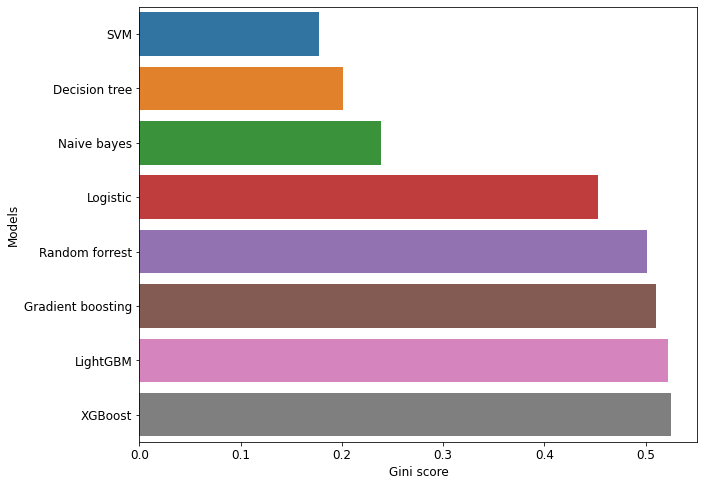

In [213]:
# Plot Gini
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x = models_gini.RFE, y=models_gini.index, data=models_gini)
ax.set_yticklabels(models_gini.index)
ax.set_xlabel("Gini score")
ax.set_ylabel("Models")
plt.show()

In [214]:
# ROC AUC
models_auc = pd.DataFrame({
    'no feature selection': [lr_auc,dt_auc,nb_auc,svm_auc,rf_auc,gb_auc,lgb_auc,xgb_auc],
    'PCA': [pca_lr_auc,pca_dt_auc,pca_nb_auc,pca_svm_auc,pca_rf_auc,pca_gb_auc,pca_lgb_auc,pca_xgb_auc],
    'SKB': [skb_lr_auc,skb_dt_auc,skb_nb_auc,skb_svm_auc,skb_rf_auc,skb_gb_auc,skb_lgb_auc,skb_xgb_auc],
    'RFE': [rfe_lr_auc,rfe_dt_auc,rfe_nb_auc,rfe_svm_auc,rfe_rf_auc,rfe_gb_auc,rfe_lgb_auc,rfe_xgb_auc]
}, columns = ['no feature selection','PCA','SKB','RFE'], index = ['Logistic','Decision tree','Naive bayes', 'SVM','Random forrest','Gradient boosting','LightGBM','XGBoost'])
 
models_auc = models_auc.sort_values(by='RFE')
models_auc

,no feature selection,PCA,SKB,RFE
SVM,0.500085,0.589116,0.588557,0.588485
Decision tree,0.601674,0.509056,0.591001,0.600755
Naive bayes,0.633219,0.500000,0.622780,0.619228
Logistic,0.635517,0.500000,0.722212,0.726346
Random forrest,0.752928,0.751101,0.750219,0.750513
Gradient boosting,0.753892,0.755465,0.753433,0.754885
LightGBM,0.762075,0.763231,0.758415,0.760847
XGBoost,0.633219,0.500754,0.760955,0.762436


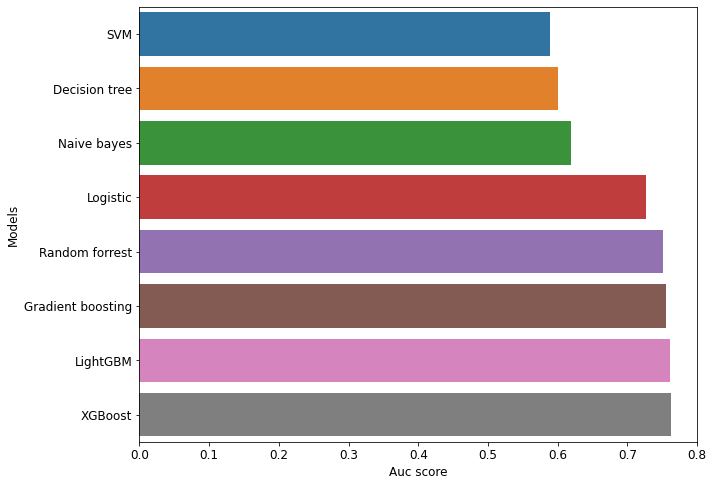

In [215]:
# Plot ROC AUC
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x = models_auc.RFE, y=models_auc.index, data=models_gini)
ax.set_yticklabels(models_auc.index)
ax.set_xlabel("Auc score")
ax.set_ylabel("Models")
plt.show()

### Conclusion
- SVM is the worst model and take too much time for training
- XGB with RFE is the best model with highest Gini score
=> We use XGB to tune the parameter

In [216]:
# Best model to tune parameters
print(xgb_rfe.get_xgb_params())

{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'monotone_constraints': '()', 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


# TUNING MODEL

## Gridsearch CV

In [218]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train,y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7, 0.9],
        'n_estimators' : [200, 500,7000]
    }

    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'roc_auc',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [219]:
hyperParameterTuning(rfe_X_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 98.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 251.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 903.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 1102.2min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 1250.5min finished


[13:31:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 500,
 'subsample': 0.7}

### Best fit

In [220]:
xgb_model = XGBClassifier(
        objective = 'binary:logistic',
        colsample_bytree = 0.7,
        learning_rate = 0.05,
        max_depth = 7,
        min_child_weight = 1,
        n_estimators = 500,
        subsample = 0.7)

%time xgb_model.fit(rfe_X_train, y_train)

y_pred_xgb = pd.DataFrame(xgb_model.predict_proba(rfe_X_test))

fpr, tpr, threshold = roc_curve(y_test,y_pred_xgb[1])
rangrid_rf_auc = auc(fpr, tpr)
rangrid_rf_gini = 2*rangrid_rf_auc-1
print('AUC score :', rangrid_rf_auc)
print('Gini score :', rangrid_rf_gini)

[13:33:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 7min 37s, sys: 2.58 s, total: 7min 39s
Wall time: 1min 3s
AUC score : 0.7699487270996631
Gini score : 0.5398974541993262


In [221]:
# Confusion matrix
y_test_pred = xgb_model.predict(rfe_X_test)
final_cm = confusion_matrix(y_test,y_test_pred)
print('Confusion matrix\n\n', final_cm)

Confusion matrix

 [[13378   849]
 [ 3759  2014]]


### Plot Results

<AxesSubplot:>

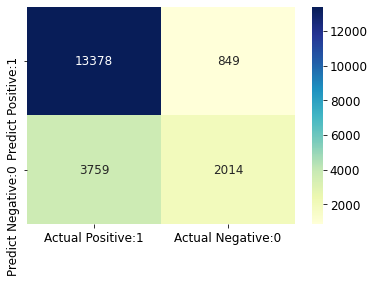

In [222]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=final_cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

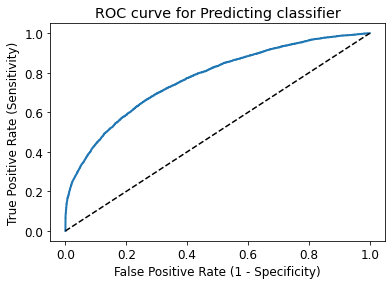

In [223]:
# plot ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb[1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()